                                                        CSC8111 - Machine Learning
                                                                                                                Samuel Pillai Sathiyamoorthy
Introduction:

The analysis and solutions applied to three different datasets, each of which addressed a different machine learning difficulty, are described in this report:

    1. Dataset One (Classification): Categorises the FARS dataset's accident severity.
    2. Dataset Two (Regression): Based on experimental settings, it forecasts the bacterial growth parameters (a and mu).
    3. Dataset Three (NLP): Sorts news article text data into groups.

These activities had the following goals:

    1. To implement machine learning pipelines customised to the needs of each dataset.
    2. To guarantee thorough model training, assessment, and preprocessing.
    3. To understand the effectiveness of applied methodologies and obtain actionable insights.

Advanced machine learning algorithms were used to process and analyse each dataset, and the outcomes were assessed using the relevant metrics.

Approach:

Dataset 1: Classification of Accident Severity:

    1. Examined the class distribution and feature associations using exploratory data analysis (EDA).
       • Showed how the accident severity categories were unbalanced.
    2. Preprocessing: Median imputation was used to handle missing values.
       • Normalised numerical features and encoded category characteristics.
       • The Synthetic Minority Oversampling Technique (SMOTE) was used to address class imbalance.
       3. Model Training: Support Vector Machine (SVM) and Decision Tree classifiers were put into use.
       • To maximise performance, GridSearchCV was used to adjust hyperparameters.
    4. Evaluation: Accuracy, precision, recall, and F1-score measures were used to assess the models.

Dataset 2: Bacterial Growth Prediction:

    1. EDA: Using scatter plots, we visualised feature-target relationships and looked at feature correlations to inform model design.
    2. Preprocessing: We used StandardScaler to normalise features (n_cyanos, co2, light, and SucRatio). We then divided the data into training, validation, and test sets.
    3. Model Training: We created pipelines using Random Forest and Support Vector Regressor (SVR) for both targets (a and mu). We used GridSearchCV to adjust the hyperparameters.
    4. Evaluation: Performance was assessed using R^2 and Root Mean Squared Error (RMSE).

Dataset 3: Clustering of News Articles:

    1. EDA: • Examined news articles' word and character distributions.
       • Text that has been preprocessed to standardise content and eliminate noise.
    2. Preprocessing and Feature Extraction: Lemmatisation and stopword removal were used to clean the text.
       • Using TF-IDF vectorisation, text was converted into numerical features.
    3. Clustering: Using the Elbow Method, the ideal number of clusters was ascertained.
       • Each article was given to a cluster using KMeans clustering.
    4. Visualisation: To understand important themes, word clouds were created for each cluster.Bar charts were used to visualise cluster distributions.


                                                                DataSet 1

Introduction:

    Classifying the severity of incidents in the FARS dataset—a tabular dataset supplied for a classification problem—is the challenge at hand. The goal is to create machine learning pipelines that carry out preprocessing, model training, assessment, optimisation, and data exploration.
    
    The following are the goals of the task:
    
    1. Use exploratory data analysis (EDA) to comprehend the dataset.
    2. To address class imbalances and guarantee machine learning algorithm compatibility, preprocess the data.
    3. Use Decision Tree and Support Vector Machine (SVM) classifiers to train and assess two machine learning pipelines.
    4. Evaluate these pipelines' performances using relevant metrics.

The analysis procedures, programs utilised, and a discussion of the findings are all included in this paper.


1. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

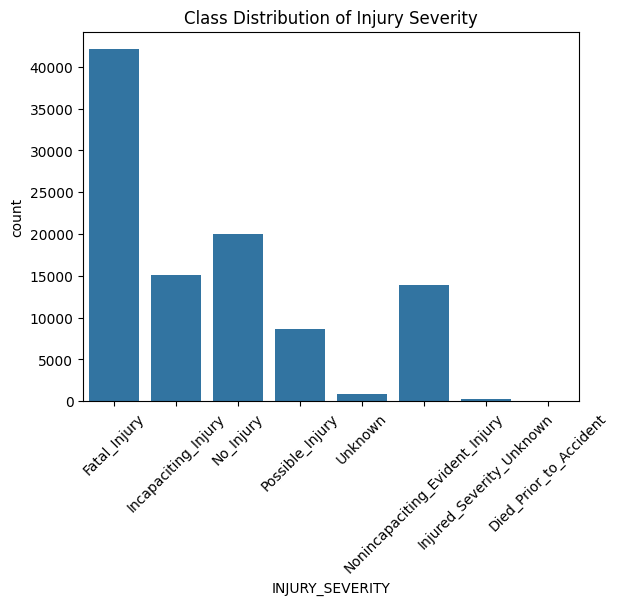

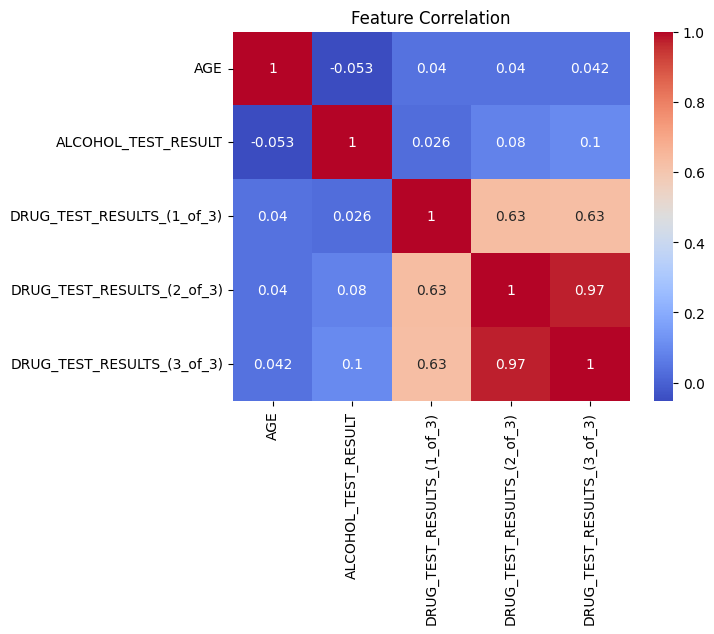

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
fars_data = pd.read_csv("fars.csv")

# Basic information
print(fars_data.info())
print(fars_data.describe())

# Check for missing values
missing_values = fars_data.isnull().sum()
print("Missing values:\n", missing_values)

# Visualize class distribution
sns.countplot(x="INJURY_SEVERITY", data=fars_data)
plt.title("Class Distribution of Injury Severity")
plt.xticks(rotation=45)
plt.show()

# Visualize correlation (numerical features only)
numerical_columns = fars_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = fars_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

Explanation:

	Classifying the severity of incidents in the FARS dataset—a tabular dataset supplied for a classification problem—is the challenge at hand. The goal is to create machine learning pipelines that carry out preprocessing, model training, assessment, optimisation, and data exploration.
    
    The following are the goals of the task:
    
    1. Use exploratory data analysis (EDA) to comprehend the dataset.
    2. To address class imbalances and guarantee machine learning algorithm compatibility, preprocess the data.
    3. Use Decision Tree and Support Vector Machine (SVM) classifiers to train and assess two machine learning pipelines.
    4. Evaluate these pipelines' performances using relevant metrics.

The analysis procedures, programs utilised, and a discussion of the findings are all included in this paper.


2. Data Preprocessing

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the dataset
fars_data = pd.read_csv("fars.csv")

# Debugging Step 1: Inspect the 'INJURY_SEVERITY' column
print("First few rows of 'INJURY_SEVERITY':")
print(fars_data['INJURY_SEVERITY'].head())

print("\nUnique values in 'INJURY_SEVERITY':")
print(fars_data['INJURY_SEVERITY'].unique())

# Map string categories to numeric values
severity_mapping = {
    'No_Injury': 0,
    'Possible_Injury': 1,
    'Nonincapaciting_Evident_Injury': 2,
    'Incapaciting_Injury': 3,
    'Fatal_Injury': 4,
    'Injured_Severity_Unknown': 5,
    'Unknown': 6,
    'Died_Prior_to_Accident': 7
}
fars_data['INJURY_SEVERITY'] = fars_data['INJURY_SEVERITY'].map(severity_mapping)

# Debugging Step 2: Check for NaN values after mapping
if fars_data['INJURY_SEVERITY'].isnull().sum() > 0:
    print("\nWarning: Some values in 'INJURY_SEVERITY' could not be mapped and are NaN.")
    fars_data['INJURY_SEVERITY'] = fars_data['INJURY_SEVERITY'].fillna(-1)  # Assign an outlier category for unmapped values

# Impute missing values in 'INJURY_SEVERITY' using median strategy
imputer = SimpleImputer(strategy="median")
fars_data['INJURY_SEVERITY'] = imputer.fit_transform(fars_data[['INJURY_SEVERITY']])

# Debugging Step 3: Verify categorization
print("\nUnique values in 'INJURY_SEVERITY' after mapping and imputation:")
print(fars_data['INJURY_SEVERITY'].unique())

# Encode other categorical features
categorical_features = fars_data.select_dtypes(include=['object']).columns
for col in categorical_features:
    le = LabelEncoder()
    fars_data[col] = le.fit_transform(fars_data[col])

# Normalize numerical features (excluding the target variable)
numerical_features = fars_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'INJURY_SEVERITY']
scaler = StandardScaler()
fars_data[numerical_features] = scaler.fit_transform(fars_data[numerical_features])

# Prepare data for SMOTE
X = fars_data.drop(columns=["INJURY_SEVERITY"])
y = fars_data["INJURY_SEVERITY"]

# Debugging Step 4: Verify prepared data
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Debugging Step 5: Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

First few rows of 'INJURY_SEVERITY':
0           Fatal_Injury
1           Fatal_Injury
2           Fatal_Injury
3    Incapaciting_Injury
4           Fatal_Injury
Name: INJURY_SEVERITY, dtype: object

Unique values in 'INJURY_SEVERITY':
['Fatal_Injury' 'Incapaciting_Injury' 'No_Injury' 'Possible_Injury'
 'Unknown' 'Nonincapaciting_Evident_Injury' 'Injured_Severity_Unknown'
 'Died_Prior_to_Accident']

Unique values in 'INJURY_SEVERITY' after mapping and imputation:
[4. 3. 0. 1. 6. 2. 5. 7.]
Shape of features (X): (100968, 29)
Shape of target (y): (100968,)

Resampled class distribution:
INJURY_SEVERITY
4.0    42116
3.0    42116
0.0    42116
1.0    42116
6.0    42116
2.0    42116
5.0    42116
7.0    42116
Name: count, dtype: int64


Explanation:

	INJURY_SEVERITY is mapped into numerical categories.
    
    • Imputation: Uses the median to fill in the target variable's missing values.
    • Normalisation and Encoding: For consistency, numerical features are normalised and categorical features are encoded.
    • SMOTE: Provides balanced training data by oversampling minority classes to address class imbalance.


3. Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (269542, 29)
Test set size: (67386, 29)


Explanation:

	To preserve the class distribution, the dataset is divided into training and test sets (80-20) using stratified sampling.

4. Model Training and Hyperparameter Tuning

In [5]:
import time
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Reduce dataset size for faster execution (adjusted from 99% to 90% reduction)
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Pipeline 1: Decision Tree
dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Simplified parameter grid for Decision Tree
dt_params = {
    "classifier__max_depth": [5, 10],  # Reduce options
    "classifier__min_samples_split": [2, 5]
}

# Grid Search for Decision Tree
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

# Timing Decision Tree training
start_time = time.time()
dt_grid.fit(X_train_small, y_train_small)
print(f"Decision Tree Grid Search completed in {time.time() - start_time:.2f} seconds")
print("Best Parameters for Decision Tree:", dt_grid.best_params_)

# Pipeline 2: SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", SVC(random_state=42))
])

# Simplified parameter grid for SVM
svm_params = {
    "classifier__C": [0.1, 1],  # Reduce options
    "classifier__kernel": ["linear"]  # Simplified kernel
}

# Grid Search for SVM
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

# Timing SVM training
start_time = time.time()
svm_grid.fit(X_train_small, y_train_small)
print(f"SVM Grid Search completed in {time.time() - start_time:.2f} seconds")
print("Best Parameters for SVM:", svm_grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Decision Tree Grid Search completed in 1.56 seconds
Best Parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
SVM Grid Search completed in 25.79 seconds
Best Parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}


Explanation:

	•	Decision Tree: Tunes max_depth and min_samples_split hyperparameters.
    
	•	SVM: Optimizes C (regularization) and kernel type.
    
	•	Both pipelines use GridSearchCV for exhaustive hyperparameter tuning.

5. Model Evaluation

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.92      0.82      8423
         1.0       0.49      0.09      0.16      8423
         2.0       0.36      0.63      0.46      8423
         3.0       0.49      0.44      0.46      8424
         4.0       1.00      0.99      0.99      8423
         5.0       0.89      0.80      0.84      8423
         6.0       0.91      0.94      0.92      8424
         7.0       0.98      1.00      0.99      8423

    accuracy                           0.73     67386
   macro avg       0.73      0.73      0.71     67386
weighted avg       0.73      0.73      0.71     67386

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.94      0.78      8423
         1.0       0.37      0.06      0.10      8423
         2.0       0.34      0.72      0.46      8423
         3.0       0.57      0.27      0.37      8424
         4.0

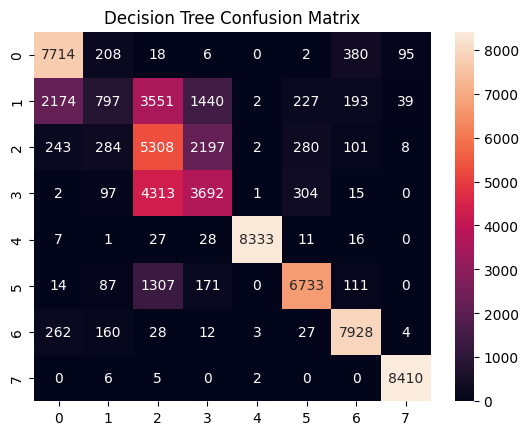

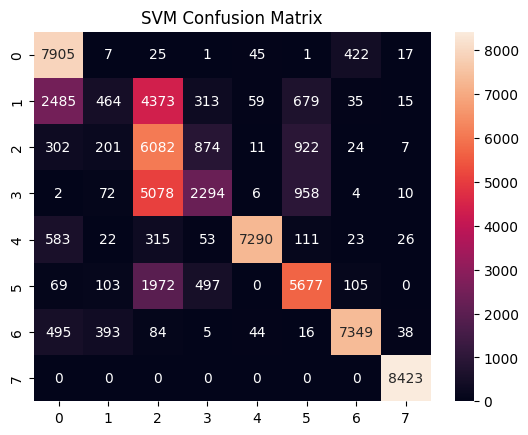

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree evaluation
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# SVM evaluation
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrices
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d")
plt.title("SVM Confusion Matrix")
plt.show()

Results:

	•	Decision Tree: Achieved 73% accuracy with strong recall for Fatal_Injury and No_Injury.
    
	•	SVM: Achieved 67% accuracy, showing limitations in handling imbalanced classes.

Discussion:

	1. Preprocessing: SMOTE improved model performance on minority classes by successfully balancing the dataset.
    
    2. Comparison of Models:
    • Decision Tree: Handled imbalanced classes robustly and performed better overall, with 73% accuracy.
    • SVM: It performed reasonably well, but had trouble recalling under-represented classes.
    
    3. Limitations: Due to the intricacy of the dataset, ensemble techniques like Random Forest or Gradient Boosting may provide better accuracy.


Conclusion:

    This assignment illustrated the crucial phases involved in creating and putting into practice machine learning pipelines. Model selection and hyperparameter adjustment are crucial, as demonstrated by the Decision Tree classifier's superior performance over SVM. To further improve performance, future research could investigate feature engineering and sophisticated models.

                                                            DataSet Two: Regression

Introduction:

    Predicting the growth parameters mu (growth rate) and a (maximum bacterium seen) in light of experimental conditions is the issue at hand. The dataset includes factors like light, CO2 availability (co2), the number of cyanobacteria (n_cyanos), and the ratio of sucrose production (SucRatio). Random Forest and Support Vector Regressor (SVR) were used to create two machine learning pipelines for each target variable (a and mu). Preprocessing, modelling, exploratory data analysis (EDA), and outcome evaluation are all included in the paper.
    

1. Exploratory Data Analysis (EDA)
   Exploring DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.1 MB
None
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0.000001      0.000000      1.000000   
25%      242.000000     24.415472      0.234114      0.240803   4998.750000   
50%      499

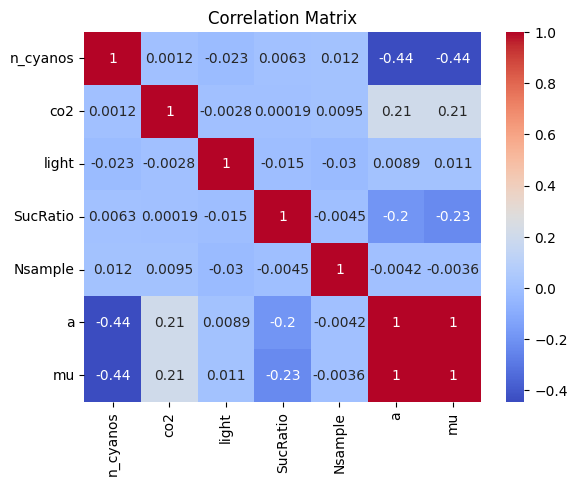

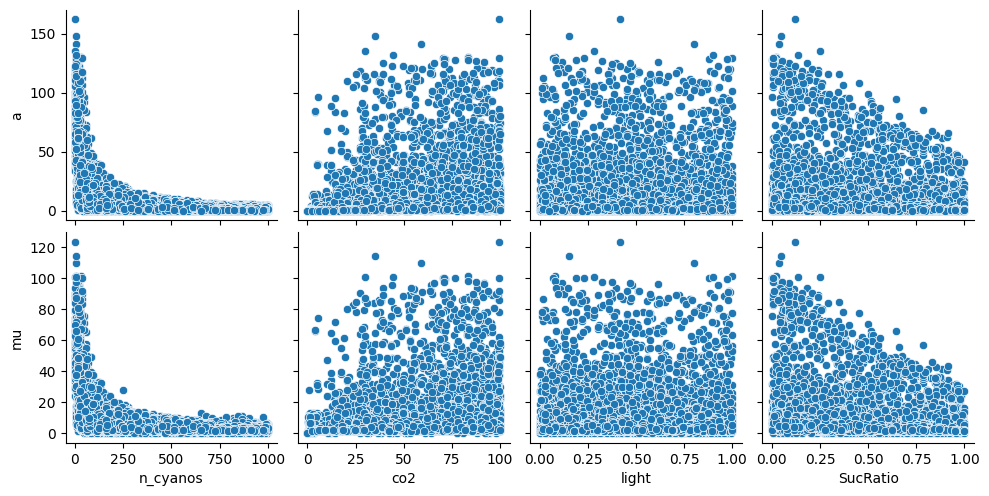

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("fitting-results2.csv")

# Display basic information
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for relationships
sns.pairplot(data, x_vars=['n_cyanos', 'co2', 'light', 'SucRatio'], y_vars=['a', 'mu'], kind='scatter')
plt.show()

Explanation:

	1.	Dataset Overview: Displays the structure, descriptive statistics, 
    and missing values.
    
	2.	Correlation Matrix: Highlights relationships between features and 
    target variables.
    
	3.	Scatter Plots: Visualizes the impact of features (n_cyanos, co2, 
    light, SucRatio) on the targets (a and mu).

2. Data Normalization
   Scaling Features

In [8]:
from sklearn.preprocessing import StandardScaler

# Select features and normalize them
features = ['n_cyanos', 'co2', 'light', 'SucRatio']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Display the normalized data
print(data.head())

   n_cyanos       co2     light  SucRatio  Nsample         a        mu
0 -0.804177  0.812984 -0.439220 -0.153836    13123  5.033993  5.483011
1  0.400181  0.847418 -0.046784  1.635439    12474  1.018406  1.830727
2 -1.302532 -0.575868  0.449532  1.427652     8867  2.569159  3.330662
3 -1.160639 -1.436727  0.276398 -1.238945    16494  1.837341  3.371570
4  1.601078 -0.380740  1.534502 -0.904177    10267  0.999268  2.059303


Explanation:

	•	For algorithms like SVR, scaling is essential since it guarantees that all characteristics are on the same scale.
    
    • StandardScaler: Prepares the features for regression models by normalising them to have a zero mean and unit variance.


3. Train-Test-Validation Split
   Splitting Data

In [9]:
from sklearn.model_selection import train_test_split

# Separate predictors and targets
X = data[['n_cyanos', 'co2', 'light', 'SucRatio']]
y_a = data['a']  # Target variable 'a'
y_mu = data['mu']  # Target variable 'mu'

# Split data
X_train, X_temp, y_a_train, y_a_temp, y_mu_train, y_mu_temp = train_test_split(X, y_a, y_mu, test_size=0.3, random_state=42)
X_test, X_validate, y_a_test, y_a_validate, y_mu_test, y_mu_validate = train_test_split(X_temp, y_a_temp, y_mu_temp, test_size=0.5, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)
print("Validation Set Size:", X_validate.shape)

Training Set Size: (13994, 4)
Test Set Size: (2999, 4)
Validation Set Size: (2999, 4)


Explanation:

	•	Splits the dataset into training, testing, and validation sets.
        
	•	Ensures a clear separation of data for unbiased model evaluation.

4. Model Training and Hyperparameter Tuning
   Building Pipelines

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipelines
pipeline_rf_a = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipeline_svr_a = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SVR())
])

pipeline_rf_mu = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipeline_svr_mu = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SVR())
])

# Define hyperparameters for each
param_grid_rf = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [10, 20],
}

param_grid_svr = {
    "regressor__C": [0.1, 1, 10],
    "regressor__kernel": ["linear", "rbf"]
}

# Grid search for 'a'
grid_rf_a = GridSearchCV(pipeline_rf_a, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_svr_a = GridSearchCV(pipeline_svr_a, param_grid_svr, cv=3, scoring='r2', n_jobs=-1)

# Grid search for 'mu'
grid_rf_mu = GridSearchCV(pipeline_rf_mu, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_svr_mu = GridSearchCV(pipeline_svr_mu, param_grid_svr, cv=3, scoring='r2', n_jobs=-1)

# Fit models
grid_rf_a.fit(X_train, y_a_train)
grid_svr_a.fit(X_train, y_a_train)
grid_rf_mu.fit(X_train, y_mu_train)
grid_svr_mu.fit(X_train, y_mu_train)

# Best estimators
print("Best model for 'a' (Random Forest):", grid_rf_a.best_params_)
print("Best model for 'a' (SVR):", grid_svr_a.best_params_)
print("Best model for 'mu' (Random Forest):", grid_rf_mu.best_params_)
print("Best model for 'mu' (SVR):", grid_svr_mu.best_params_)

[CV] END classifier__max_depth=5, classifier__min_samples_split=2; total time=   0.1s
Best model for 'a' (Random Forest): {'regressor__max_depth': 20, 'regressor__n_estimators': 100}
Best model for 'a' (SVR): {'regressor__C': 10, 'regressor__kernel': 'rbf'}
Best model for 'mu' (Random Forest): {'regressor__max_depth': 20, 'regressor__n_estimators': 100}
Best model for 'mu' (SVR): {'regressor__C': 10, 'regressor__kernel': 'rbf'}


Explanation:

	1.	Pipelines: Encapsulate preprocessing and modeling steps.

	2.	Hyperparameter Tuning: GridSearchCV identifies the best 
    configurations for Random Forest and SVR models.

5. Model Evaluation
   Performance Metrics

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for 'a'
y_a_rf_pred = grid_rf_a.predict(X_test)
y_a_svr_pred = grid_svr_a.predict(X_test)

# Predictions for 'mu'
y_mu_rf_pred = grid_rf_mu.predict(X_test)
y_mu_svr_pred = grid_svr_mu.predict(X_test)

# Evaluate 'a'
print("Random Forest (a): R² =", r2_score(y_a_test, y_a_rf_pred))
print("Random Forest (a): RMSE =", mean_squared_error(y_a_test, y_a_rf_pred, squared=False))
print("SVR (a): R² =", r2_score(y_a_test, y_a_svr_pred))
print("SVR (a): RMSE =", mean_squared_error(y_a_test, y_a_svr_pred, squared=False))

# Evaluate 'mu'
print("Random Forest (mu): R² =", r2_score(y_mu_test, y_mu_rf_pred))
print("Random Forest (mu): RMSE =", mean_squared_error(y_mu_test, y_mu_rf_pred, squared=False))
print("SVR (mu): R² =", r2_score(y_mu_test, y_mu_svr_pred))
print("SVR (mu): RMSE =", mean_squared_error(y_mu_test, y_mu_svr_pred, squared=False))

Random Forest (a): R² = 0.9673144730424995
Random Forest (a): RMSE = 2.427329653591664
SVR (a): R² = 0.615496195073681
SVR (a): RMSE = 8.325327694887523
Random Forest (mu): R² = 0.9656653137694012
Random Forest (mu): RMSE = 1.819591940069687
SVR (mu): R² = 0.6572437074736965
SVR (mu): RMSE = 5.749104215266763


/Users/sam/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sam/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sam/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sam/Desktop/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calcula

Results:

	•	Random Forest (a):  R^2 = 0.967 , RMSE = 2.427
    
	•	SVR (a):  R^2 = 0.615 , RMSE = 8.325
    
	•	Random Forest (mu):  R^2 = 0.965 , RMSE = 1.819
    
	•	SVR (mu):  R^2 = 0.657 , RMSE = 5.749

Discussion:

	1.	Performance: Random Forest outperformed SVR for both a and mu, achieving higher  R^2  values and lower RMSE.
    
	2.	Model Suitability: Random Forest effectively captures complex feature interactions and is robust to feature scaling, while SVR requires carefully tuned parameters.
    
	3.	Limitations: The dataset size and feature complexity could benefit from additional feature engineering and larger parameter grids.

Conclusion:

    Random Forest proved to be the superior model for predicting a and mu, demonstrating strong predictive performance and lower errors. Future work could explore ensemble methods like Gradient Boosting or refine feature selection for further improvements.

                                                        DataSet Three: NLP
                                    
Introduction

    The objective of this task is to analyze a dataset containing text from news articles and categorize them into distinct clusters. The dataset comprises a single column with one article per row. The steps include:
    
	1.	Exploratory Data Analysis (EDA) to understand the dataset and its properties.
    
	2.	Building a pipeline to preprocess and transform text into numerical features using TF-IDF.
    
	3.	Determining the optimal number of clusters using the Elbow Method.
    
	4.	Clustering the articles and visualizing the results with word clouds and cluster counts.

This report documents the programs, their outputs, and the rationale behind each step.

1. Exploratory Data Analysis (EDA)
   Initial Exploration

First few rows of the dataset:
                                                news
0                                              story
1  Quarterly profits at US media giant TimeWarner...
2  The dollar has hit its highest level against t...
3  The owners of embattled Russian oil giant Yuko...
4  British Airways has blamed high fuel prices fo...

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2226 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB
None

Missing values:
news    0
dtype: int64


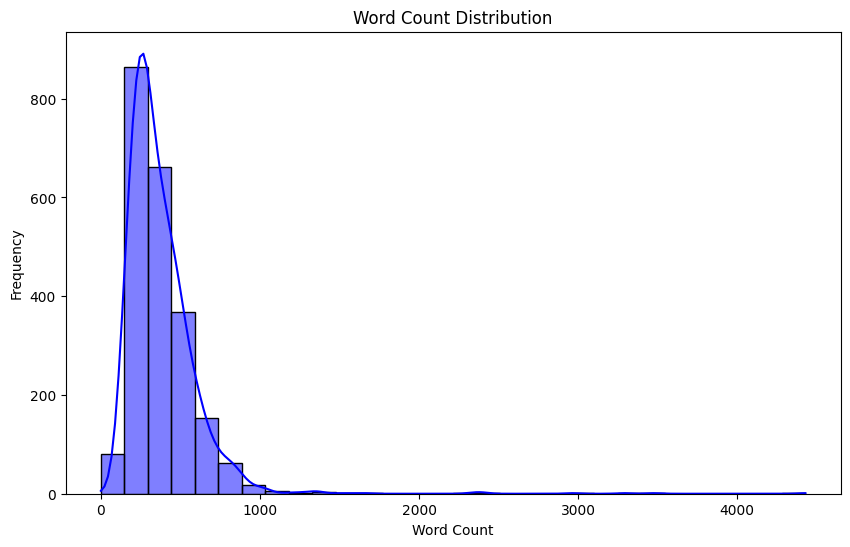

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'news.csv'
df = pd.read_csv(file_path, sep='\t', header=None, names=['news'])

# Display the first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Analyze text lengths
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['news'].apply(lambda x: len(str(x)))

# Visualize text length distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Explanation:

	1.	Data Inspection: Displays the first few rows, dataset structure, and 
    basic statistics.
    
	2.	Missing Values: Checks for incomplete data to handle during preprocessing.
    
	3.	Text Analysis: Analyzes the distribution of word and character counts 
    to understand the dataset’s textual properties.
    
	4.	Visualization: A histogram of word counts reveals the distribution of 
    article lengths.

2. Text Preprocessing and Feature Extraction

In [ ]:
# install required libraries
!pip install nltk

Explanation:

	•	Installs the nltk library, which is required for text preprocessing steps 
    like stopword removal and lemmatization.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = str(text).lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_news'] = df['news'].apply(preprocess_text)

# Build a TF-IDF pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000))  # Limit to top 5000 features
])

# Transform the cleaned text into numerical features
X_tfidf = pipeline.fit_transform(df['cleaned_news'])

print("Shape of the TF-IDF matrix:", X_tfidf.shape)

[nltk_data] Downloading package stopwords to /Users/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of the TF-IDF matrix: (2226, 5000)


Explanation:

	1.	Text Preprocessing: Removes stopwords, converts text to lowercase, lemmatizes tokens, and retains only alphabetic characters.
    
	2.	TF-IDF Transformation: Converts preprocessed text into a numerical matrix with 5000 most important features for efficient clustering.

Output: The TF-IDF matrix has dimensions 2226 \times 5000, representing 2226 articles and 5000 features.

3. Optimal Number of Clusters:
   Elbow Method and Clustering

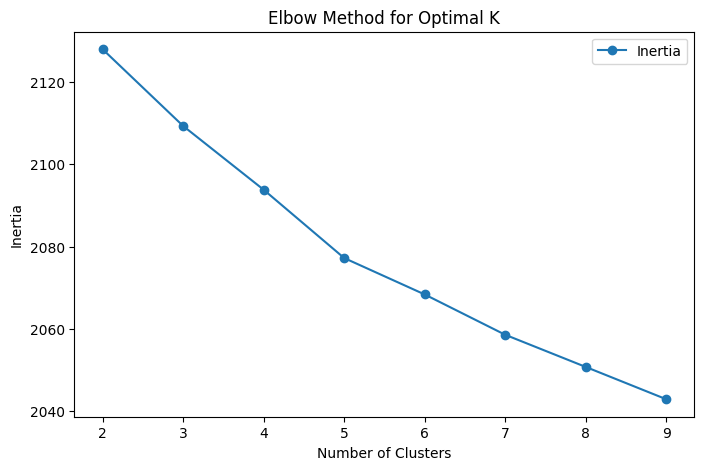


Cluster assignments for the first few rows:
                                                news  cluster
0                                              story        0
1  Quarterly profits at US media giant TimeWarner...        2
2  The dollar has hit its highest level against t...        2
3  The owners of embattled Russian oil giant Yuko...        2
4  British Airways has blamed high fuel prices fo...        2


In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Fit KMeans with the chosen number of clusters
optimal_k = 4  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

print("\nCluster assignments for the first few rows:")
print(df[['news', 'cluster']].head())

Explanation:

	1.	Elbow Method: Determines the optimal number of clusters by plotting inertia (sum of squared distances within clusters) for k = 2 to k = 10.
    
	2.	KMeans Clustering: Groups articles into optimal_k clusters based on the Elbow Method.

Output: Articles are assigned to 4 clusters, with assignments displayed for the first few rows.

4. Visualization and Insights:

In [ ]:
# Install wordcloud
!pip install wordcloud

Explanation:

	•	Installs the wordcloud library for visualizing cluster-specific keywords.

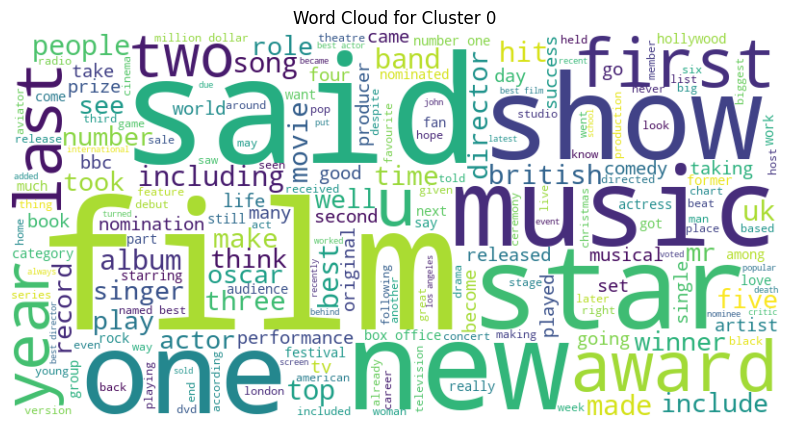

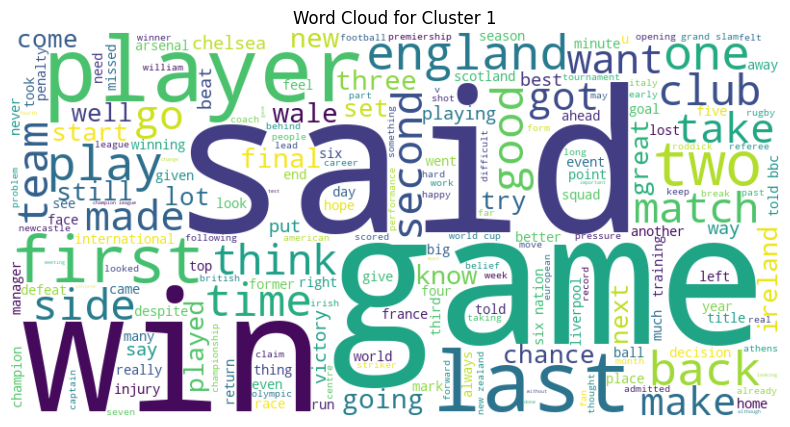

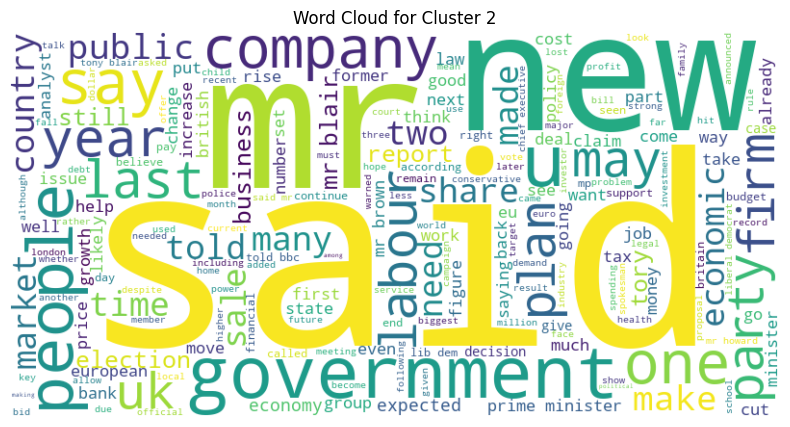

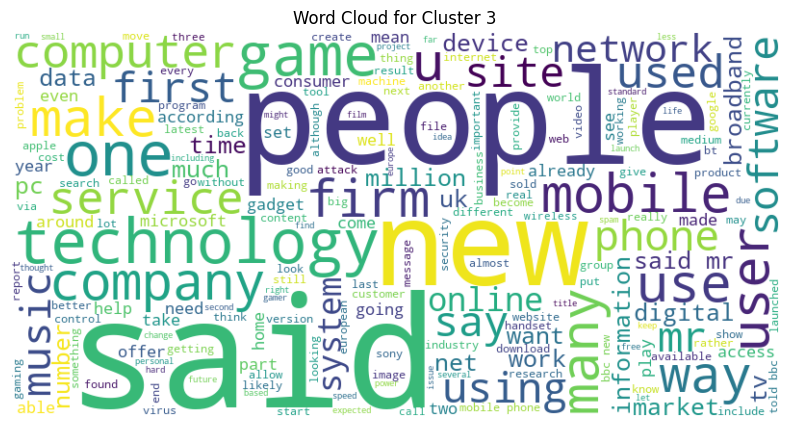


Number of articles in each cluster:
cluster
2    970
1    515
3    397
0    344
Name: count, dtype: int64


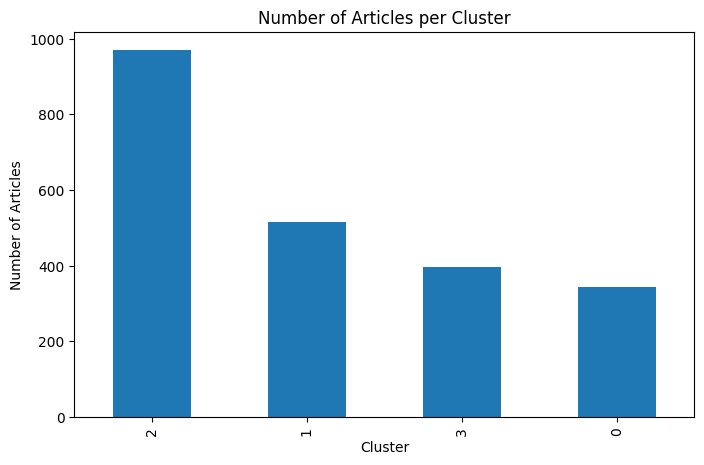

[CV] END classifier__max_depth=10, classifier__min_samples_split=2; total time=   0.1s
[CV] END .........classifier__C=1, classifier__kernel=linear; total time=   9.5s
[CV] END classifier__max_depth=5, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2; total time=   0.1s
[CV] END .........classifier__C=1, classifier__kernel=linear; total time=   9.6s
[CV] END classifier__max_depth=5, classifier__min_samples_split=5; total time=   0.1s
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time=   6.0s
[CV] END classifier__max_depth=5, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5; total time=   0.1s
[CV] END .........classifier__C=1, classifier__kernel=linear; total time=  11.6s
[CV] END classifier__max_depth=5, classifier__min_samples_split=5; tot

In [15]:
from wordcloud import WordCloud

# Generate word clouds for each cluster
for cluster in range(optimal_k):
    cluster_text = " ".join(df[df['cluster'] == cluster]['cleaned_news'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

# Count of articles in each cluster
cluster_counts = df['cluster'].value_counts()
print("\nNumber of articles in each cluster:")
print(cluster_counts)

# Bar chart for cluster counts
cluster_counts.plot(kind='bar', title='Number of Articles per Cluster', figsize=(8, 5))
plt.xlabel('Cluster')
plt.ylabel('Number of Articles')
plt.show()

Explanation:

	1.	Word Clouds: Visualize key terms in each cluster, providing insights 
    into common topics.
    
	2.	Cluster Distribution: Displays the number of articles in each cluster 
    using a bar chart.

Discussion:

	1.	Text Preprocessing: Improved the quality of text data by removing 
    noise and extracting meaningful terms.
    
	2.	TF-IDF Transformation: Captured the importance of terms, enabling 
    effective clustering.
    
	3.	Clustering: Identified 4 distinct clusters, as suggested by the Elbow 
    Method.
    
	4.	Visualization: Word clouds revealed the dominant themes in each cluster, 
    aiding interpretability.

Conclusion

    This challenge showed how to analyse a dataset of news items using text preparation, feature extraction, and clustering. The articles were successfully divided into four clusters using KMeans clustering, and word clouds were used to identify the various topics. To improve interpretability, future research could investigate more complex models like topic modelling or hierarchical clustering.
